In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
!kaggle datasets download plameneduardo/sarscov2-ctscan-dataset

 94% 217M/230M [00:01<00:00, 135MB/s]
100% 230M/230M [00:01<00:00, 126MB/s]


In [ ]:
!unzip sarscov2-ctscan-dataset.zip

Archive:  sarscov2-ctscan-dataset.zip
  inflating: COVID/Covid (1).png     
  inflating: COVID/Covid (10).png    
  inflating: COVID/Covid (100).png   
  inflating: COVID/Covid (1000).png  
  inflating: COVID/Covid (1001).png  
  inflating: COVID/Covid (1002).png  
  inflating: COVID/Covid (1003).png  
  inflating: COVID/Covid (1004).png  
  inflating: COVID/Covid (1005).png  
  inflating: COVID/Covid (1006).png  
  inflating: COVID/Covid (1007).png  
  inflating: COVID/Covid (1008).png  
  inflating: COVID/Covid (1009).png  
  inflating: COVID/Covid (101).png   
  inflating: COVID/Covid (1010).png  
  inflating: COVID/Covid (1011).png  
  inflating: COVID/Covid (1012).png  
  inflating: COVID/Covid (1013).png  
  inflating: COVID/Covid (1014).png  
  inflating: COVID/Covid (1015).png  
  inflating: COVID/Covid (1016).png  
  inflating: COVID/Covid (1017).png  
  inflating: COVID/Covid (1018).png  
  inflating: COVID/Covid (1019).png  
  inflating: COVID/Covid (102).png   
  inflating:

In [ ]:
import pandas as pd

In [ ]:
!pwd

/content


In [ ]:
folder_name=['COVID', 'non-COVID']
all_folders=os.listdir()
data=[]
i=0
for folder in folder_name:
  files = os.listdir('/content/'+folder)
  print(files)
  for _file in files:
    data.append([_file,i,folder])
    i+=1

['Covid (346).png', 'Covid (957).png', 'Covid (395).png', 'Covid (1000).png', 'Covid (1044).png', 'Covid (8).png', 'Covid (742).png', 'Covid (406).png', 'Covid (739).png', 'Covid (33).png', 'Covid (56).png', 'Covid (996).png', 'Covid (1189).png', 'Covid (111).png', 'Covid (584).png', 'Covid (757).png', 'Covid (25).png', 'Covid (203).png', 'Covid (1180).png', 'Covid (1056).png', 'Covid (210).png', 'Covid (593).png', 'Covid (485).png', 'Covid (142).png', 'Covid (60).png', 'Covid (274).png', 'Covid (752).png', 'Covid (729).png', 'Covid (697).png', 'Covid (692).png', 'Covid (1214).png', 'Covid (894).png', 'Covid (426).png', 'Covid (649).png', 'Covid (338).png', 'Covid (795).png', 'Covid (645).png', 'Covid (409).png', 'Covid (93).png', 'Covid (833).png', 'Covid (566).png', 'Covid (4).png', 'Covid (949).png', 'Covid (397).png', 'Covid (862).png', 'Covid (600).png', 'Covid (1218).png', 'Covid (350).png', 'Covid (547).png', 'Covid (1070).png', 'Covid (735).png', 'Covid (1131).png', 'Covid (100

In [ ]:
data

[['Covid (346).png', 0, 'COVID'],
 ['Covid (957).png', 1, 'COVID'],
 ['Covid (395).png', 2, 'COVID'],
 ['Covid (1000).png', 3, 'COVID'],
 ['Covid (1044).png', 4, 'COVID'],
 ['Covid (8).png', 5, 'COVID'],
 ['Covid (742).png', 6, 'COVID'],
 ['Covid (406).png', 7, 'COVID'],
 ['Covid (739).png', 8, 'COVID'],
 ['Covid (33).png', 9, 'COVID'],
 ['Covid (56).png', 10, 'COVID'],
 ['Covid (996).png', 11, 'COVID'],
 ['Covid (1189).png', 12, 'COVID'],
 ['Covid (111).png', 13, 'COVID'],
 ['Covid (584).png', 14, 'COVID'],
 ['Covid (757).png', 15, 'COVID'],
 ['Covid (25).png', 16, 'COVID'],
 ['Covid (203).png', 17, 'COVID'],
 ['Covid (1180).png', 18, 'COVID'],
 ['Covid (1056).png', 19, 'COVID'],
 ['Covid (210).png', 20, 'COVID'],
 ['Covid (593).png', 21, 'COVID'],
 ['Covid (485).png', 22, 'COVID'],
 ['Covid (142).png', 23, 'COVID'],
 ['Covid (60).png', 24, 'COVID'],
 ['Covid (274).png', 25, 'COVID'],
 ['Covid (752).png', 26, 'COVID'],
 ['Covid (729).png', 27, 'COVID'],
 ['Covid (697).png', 28, 'COVID

In [ ]:
type(data)

list

In [ ]:
data_df=pd.DataFrame(data, columns = ['filename','ID','disease_type'])
data_df

,filename,ID,disease_type
0,Covid (346).png,0,COVID
1,Covid (957).png,1,COVID
2,Covid (395).png,2,COVID
3,Covid (1000).png,3,COVID
4,Covid (1044).png,4,COVID
...,...,...,...
2476,Non-Covid (1185).png,2476,non-COVID
2477,Non-Covid (1055).png,2477,non-COVID
2478,Non-Covid (307).png,2478,non-COVID
2479,Non-Covid (696).png,2479,non-COVID


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
len(data_df)

2481

In [ ]:
data_df.iloc[2480,0]

'Non-Covid (1050).png'

In [ ]:
data_df.iloc[2480,1]

2480

In [ ]:
data_df.iloc[2480,2]

'non-COVID'

In [ ]:
import imgaug.augmenters as iaa

class_id = {'COVID': 0, 'non-COVID': 1}
folder_path = '/content/'

X = []
Y = []

for i in range(len(data_df)):
    file_path = folder_path + '/' + data_df.iloc[i, 2] + '/' + data_df.iloc[i, 0]
    img = cv2.imread(file_path)
    img_resize = cv2.resize(img, (64, 64))
    img_resize_normalise = img_resize / 255
    X.append(img_resize_normalise)
    Y.append(class_id[data_df.iloc[i, 2]])

    vflip = iaa.Flipud(p=1)
    hflip = iaa.Fliplr(p=1)
    translating = iaa.Affine(translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)})
    scaling = iaa.Affine(scale={"x": (0.8, 1.2), "y": (0.8, 1.2)})
    rotation = iaa.Affine(rotate=(-40, 40))
    shearing = iaa.Affine(shear=(-40, 40))

    augmented_images = [vflip, hflip, translating, scaling, rotation, shearing]
    for aug in augmented_images:
        augmented = aug.augment_image(img_resize_normalise)
        X.append(augmented)
        Y.append(class_id[data_df.iloc[i, 2]])

assert len(X) == len(Y)


In [ ]:
len(X),len(Y)

(17367, 17367)

In [ ]:
print(Y[900])

0


In [ ]:
print(Y[2305])

0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

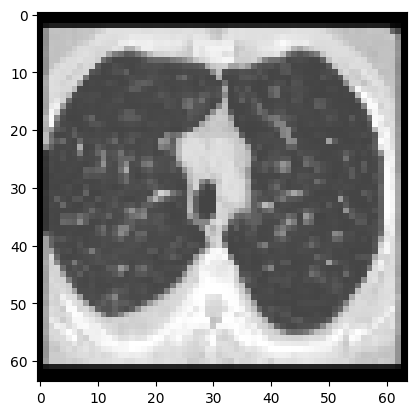

In [ ]:
plt.imshow(X[900])

In [ ]:
ch=2
print(np.max(img_resize[:,:,ch]))
print(np.max(img_resize_normalise[:,:,ch]))
print(np.min(img_resize[:,:,ch]))
print(np.min(img_resize_normalise[:,:,ch]))

255
1.0
56
0.2196078431372549


In [ ]:
X=np.array(X)
Y=np.array(Y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test=train_test_split(X, Y, test_size=0.2, shuffle = True, random_state = 7657645)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((13893, 64, 64, 3), (3474, 64, 64, 3), (13893,), (3474,))

In [ ]:
np.unique(Y_test, return_counts = True)

(array([0, 1]), array([1774, 1700]))

In [ ]:
np.unique(Y_train, return_counts = True)

(array([0, 1]), array([6990, 6903]))

In [ ]:
np.unique(X_test, return_counts =True)

(array([0.00000000e+00, 4.13602941e-04, 7.81250000e-04, ...,
        9.99992341e-01, 9.99996170e-01, 1.00000000e+00]),
 array([3316521,       3,       3, ...,     129,      36,  798864]))

In [ ]:
np.unique(X_train, return_counts = True)

(array([0.00000000e+00, 6.12745098e-05, 9.19117647e-05, ...,
        9.99992341e-01, 9.99996170e-01, 1.00000000e+00]),
 array([13300182,        3,        3, ...,      516,      171,  3346635]))

In [ ]:
import tensorflow as tf
model_cnn1=tf.keras.models.Sequential([
                                          tf.keras.layers.Conv2D(filters=5,
                                                          kernel_size = (3,3),
                                                          strides = (1,1),
                                                          padding = 'same',
                                                          activation ='relu',
                                                          input_shape=(64,64,3)
                                                          ),
                                          tf.keras.layers.MaxPool2D(pool_size = (3,3),
                                                                    padding = 'same'
                                                                    ),
                                          tf.keras.layers.Conv2D(filters = 5,
                                                                 kernel_size = (3,3),
                                                                 strides =(1,1),
                                                                 padding = 'same',
                                                                 activation = 'relu',
                                                                 ),
                                          tf.keras.layers.MaxPool2D(pool_size = (3,3),
                                                                    padding = 'same'
                                                                    ),
                                          tf.keras.layers.Flatten(),
                                          tf.keras.layers.Dense(10,activation = 'relu'),
                                          tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model_cnn1.compile(loss = 'binary_crossentropy',
                   optimizer = tf.keras.optimizers.Adam(learning_rate =0.001),
                   metrics = ['accuracy'])
history_cnn1 =model_cnn1.fit(X_train,Y_train,epochs =10,validation_data =(X_val,Y_val)
)

Epoch 1/10
391/391 [==============================] - 23s 55ms/step - loss: 0.6442 - accuracy: 0.6133 - val_loss: 0.5836 - val_accuracy: 0.6799
Epoch 2/10
391/391 [==============================] - 23s 59ms/step - loss: 0.5781 - accuracy: 0.6850 - val_loss: 0.5544 - val_accuracy: 0.7043
Epoch 3/10
391/391 [==============================] - 21s 54ms/step - loss: 0.5496 - accuracy: 0.7045 - val_loss: 0.5324 - val_accuracy: 0.7288
Epoch 4/10
391/391 [==============================] - 23s 60ms/step - loss: 0.5282 - accuracy: 0.7225 - val_loss: 0.5152 - val_accuracy: 0.7439
Epoch 5/10
391/391 [==============================] - 20s 52ms/step - loss: 0.5029 - accuracy: 0.7465 - val_loss: 0.4963 - val_accuracy: 0.7554
Epoch 6/10
391/391 [==============================] - 24s 61ms/step - loss: 0.4781 - accuracy: 0.7636 - val_loss: 0.4915 - val_accuracy: 0.7576
Epoch 7/10
391/391 [==============================] - 21s 54ms/step - loss: 0.4486 - accuracy: 0.7933 - val_loss: 0.4462 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, shuffle = True, random_state = 9809809)
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((12503, 64, 64, 3), (1390, 64, 64, 3), (12503,), (1390,))

In [ ]:
model_cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 5)         140       
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 5)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 5)         230       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 5)           0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense (Dense)               (None, 10)                3

In [ ]:
pd.DataFrame(history_cnn1.history).plot(figsize =(10,7))

NameError: name 'history_cnn1' is not defined

In [ ]:
model_cnn1.evaluate(X_test, Y_test)

109/109 [==============================] - 6s 59ms/step - loss: 0.4257 - accuracy: 0.8031


[0.4257403016090393, 0.803108811378479]

109/109 [==============================] - 2s 21ms/step


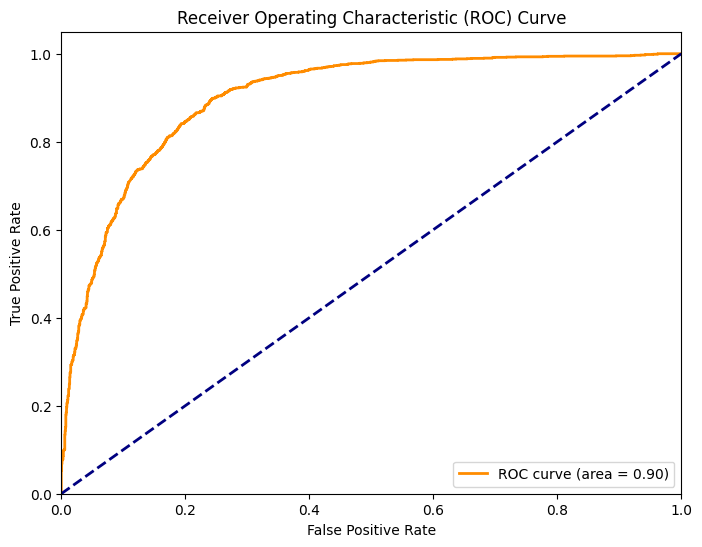

In [ ]:
from sklearn.metrics import roc_curve, auc
y_probs = model_cnn1.predict(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
y_probs = model_cnn1.predict(X_test)
y_pred = (y_probs > 0.5).astype(int)
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

109/109 [==============================] - 3s 25ms/step
Confusion Matrix:
[[1573  201]
 [ 483 1217]]
